In [ ]:
"""
Case_01

https://machinelearningmastery.com/how-to-control-the-speed-and-stability-of-training-neural-networks-with-gradient-descent-batch-size/
"""
#General Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler, CSVLogger
from sklearn.model_selection import train_test_split
import time

'''
PreProcessing
''' 
#Loading Database
df_case_01 = pd.read_csv(r'Case_01_data.csv')

#Transforming to DataFrame
df_case_01 = pd.DataFrame(df_case_01)
df_case_01 = df_case_01.drop(columns='run')

#Transforming to NumpyArray
df_case_01 = df_case_01.to_numpy()

'''
Inputs
'''
X = df_case_01[:, [0, 1, 2, 3]]

#1 --> Yeast Extract (g/L) --> index: 0
#2 --> Whey (g/L) --> index: 1
#3 --> Autoclave Temperature (ºC) --> index: 2
#4 --> Seawater (%) --> index: 3

'''
Outputs
'''
y = df_case_01[:, [4]] 

#1 --> Response: SUA (Mm urea hydrolyzed.min-1.OD-1) --> index: 4

'''
#Scaling the and preparing the data
scalerX = MinMaxScaler()
scalerY = MinMaxScaler()

#Scaling the Data
scaledX = scalerX.fit_transform(X)
scaledY = scalerY.fit_transform(y)
'''
#Train & Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size = 0.15)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#Initial time
start_time = time.time()

#Fitting the model
model.fit(X, y)

#Final time
end_time = (time.time() - start_time)
print('The running time is: %.2f minutes' %(end_time/60))

The running time is: 0.00 minutes


In [ ]:
#Making a prediction
y_pred = model.predict(X)

In [ ]:
#Metrics Global
print('Metrics Global')
mae_SUA = mean_absolute_error(y, y_pred)
print('The mae is: %.4f' %mae_SUA)
mse_SUA = mean_squared_error(y, y_pred)
print('The mse is: %.4f' %mse_SUA)
rmse_SUA = np.sqrt(mse_SUA).mean()
print('The rmse is: %.4f' %rmse_SUA)
r2_SUA = r2_score(y, y_pred)
print('The R2 is: %.4f' %r2_SUA)

Metrics Global
The mae is: 1.3784
The mse is: 2.8922
The rmse is: 1.7007
The R2 is: 0.7136


## Making the Equation

Y = B0 + B1X1 + BnXn + ... + Sigma Residual

Y = target
B0 = intercept
B1. = coefficient

In [ ]:
#Intercept of the model B0...
B0 = model.intercept_
B0 = float(B0)
B0

-9.105353386451641

In [ ]:
#Coefficients of the model B1, B2, B3, B4
coefficient = model.coef_
coefficient = np.array(coefficient)
coefficient

array([[ 0.08709817,  0.32923098,  0.08576256, -0.00680656]])

In [ ]:
#Residual Error
sigma_residual = mean_squared_error(y_pred, y)
sigma_residual 

2.8922407460218325

In [ ]:
#Making variables
B0, B1, B2, B3, B4, sigma = B0, coefficient[0,0], coefficient[0,1], coefficient[0, 2], coefficient[0, 3], sigma_residual

In [ ]:
#Create Equation
#Y = B0 + B1X1 + BnXn + ... + Sigma Residual
regression_equation = 'Y = {:.4f} + {:.4f}X1 + {:.4f}X2 + {:.4f}X3 + {:.4f}X4 + {:.4f}'.format(B0, B1, B2, B3, B4, sigma)
regression_equation

'Y = -9.1054 + 0.0871X1 + 0.3292X2 + 0.0858X3 + -0.0068X4 + 2.8922'

In [ ]:
regression_equation_str = str(regression_equation)
regression_equation_str

'Y = -9.1054 + 0.0871X1 + 0.3292X2 + 0.0858X3 + -0.0068X4 + 2.8922'

In [ ]:
print(regression_equation_str)
type(regression_equation_str)

Y = -9.1054 + 0.0871X1 + 0.3292X2 + 0.0858X3 + -0.0068X4 + 2.8922


str

## Plotting

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


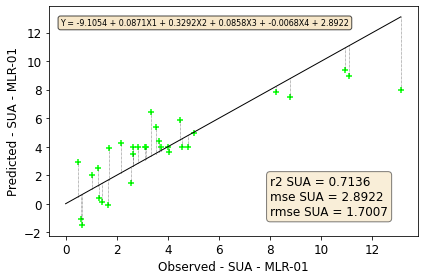

In [ ]:
'''
Plots
'''
# 'SUA (MPa)' 
fig, ax = plt.subplots()

#Add the text
textstr = '\n'.join((r'r2 SUA = %.4f' % (r2_SUA), r'mse SUA = %.4f' % (mse_SUA),
                     r'rmse SUA = %.4f' % (rmse_SUA)))

p1 = max(max(y_pred), max(y))
p2 = min(0, 0)
ax.plot([p1, p2], [p1, p2], 'k-', lw = 1)
ax.scatter(y, y_pred, s = 30, c = 'lime', marker = '+')
ax.set_yscale('linear')
ax.set_xscale('linear')
ax.set_xlabel('Observed - SUA - MLR-01', fontsize = 12)
ax.set_ylabel('Predicted - SUA - MLR-01', fontsize = 12)
props = dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.5) #Metrics
props_2 = dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.7) #Regression Equation
ax.text(8, 2,  textstr, horizontalalignment = 'left', verticalalignment = 'top', fontsize = 12, bbox = props) #Metrics
ax.text(-0.2, 13, 'Y = -9.1054 + 0.0871X1 + 0.3292X2 + 0.0858X3 + -0.0068X4 + 2.8922', horizontalalignment = 'left', 
        verticalalignment = 'top', fontsize = 8, bbox = props_2)
ax.tick_params(axis='x', colors = 'black')
ax.tick_params(axis='y', colors = 'black')
ax.tick_params(axis = 'both', which='major', labelsize = 12)
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.grid(False)
fig.tight_layout()

#Plotting the Residuals
for i in range(len(y)):
  lineXdata = (y[i], y[i])
  lineYdata = (y[i], y_pred[i])
  plt.plot(lineXdata, lineYdata, color = 'black', linestyle = 'dotted', lw = .5)
  #plt.plot(lineXdata, lineYdata, 'k-', lw = 1)

#Saving the Fig
plt.savefig('MLR-01.png', dpi = 600)